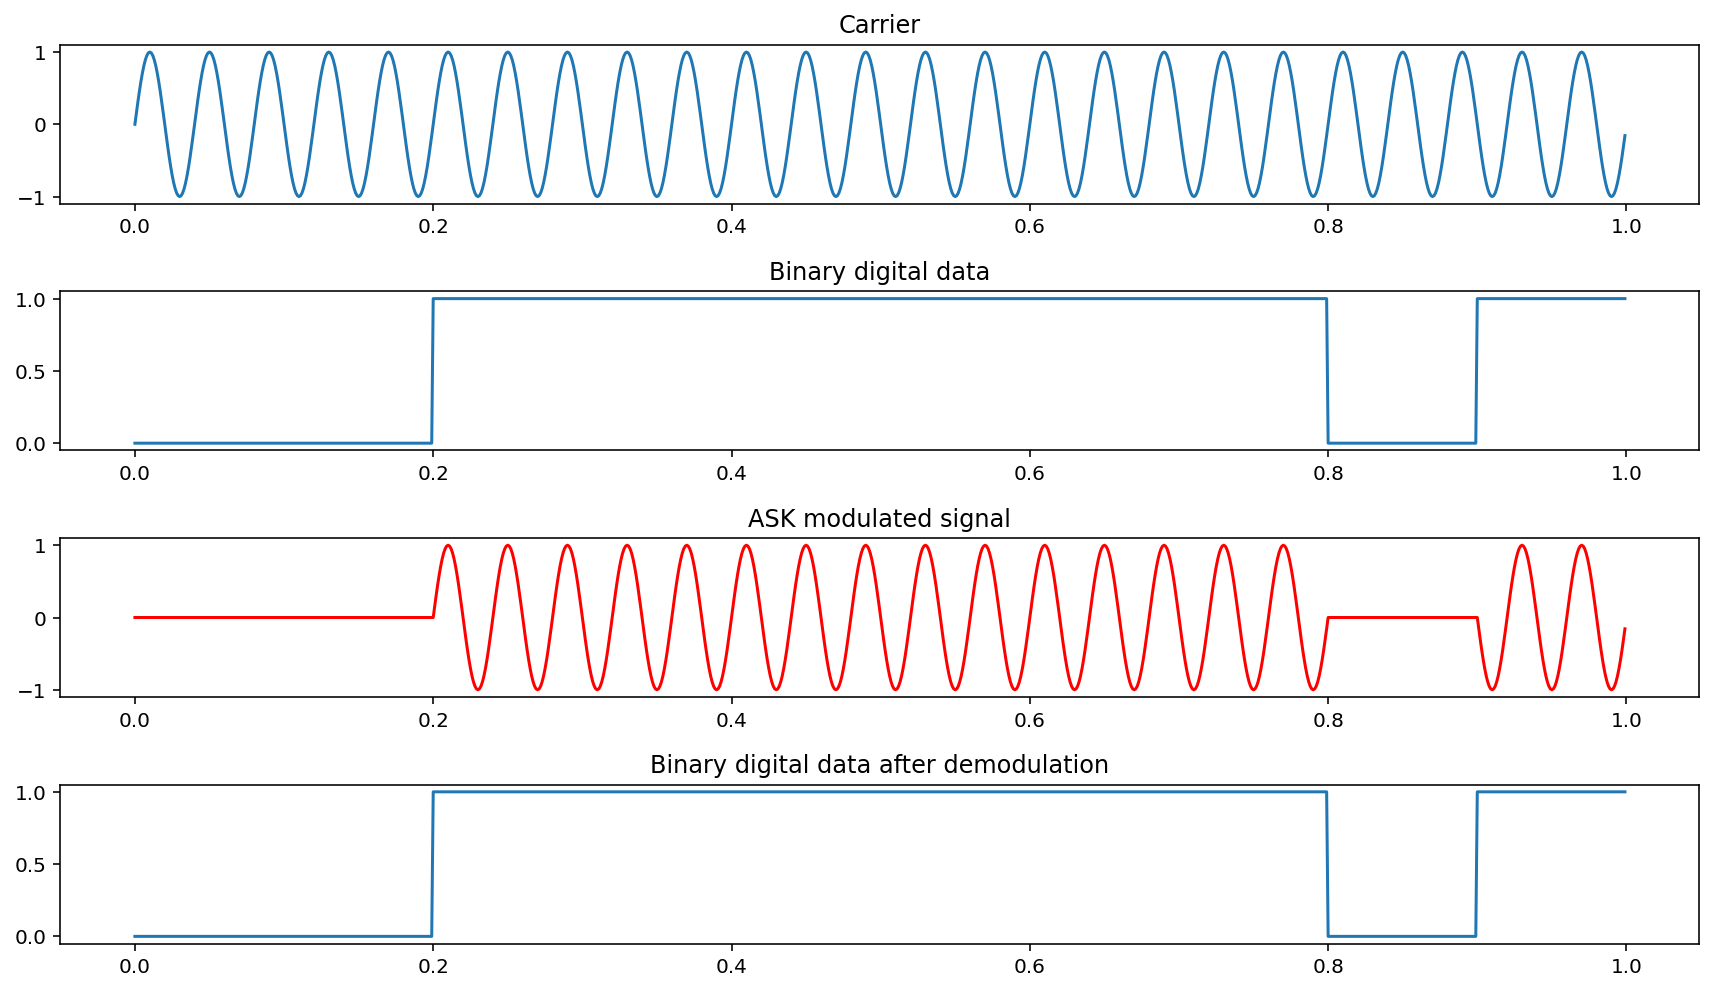

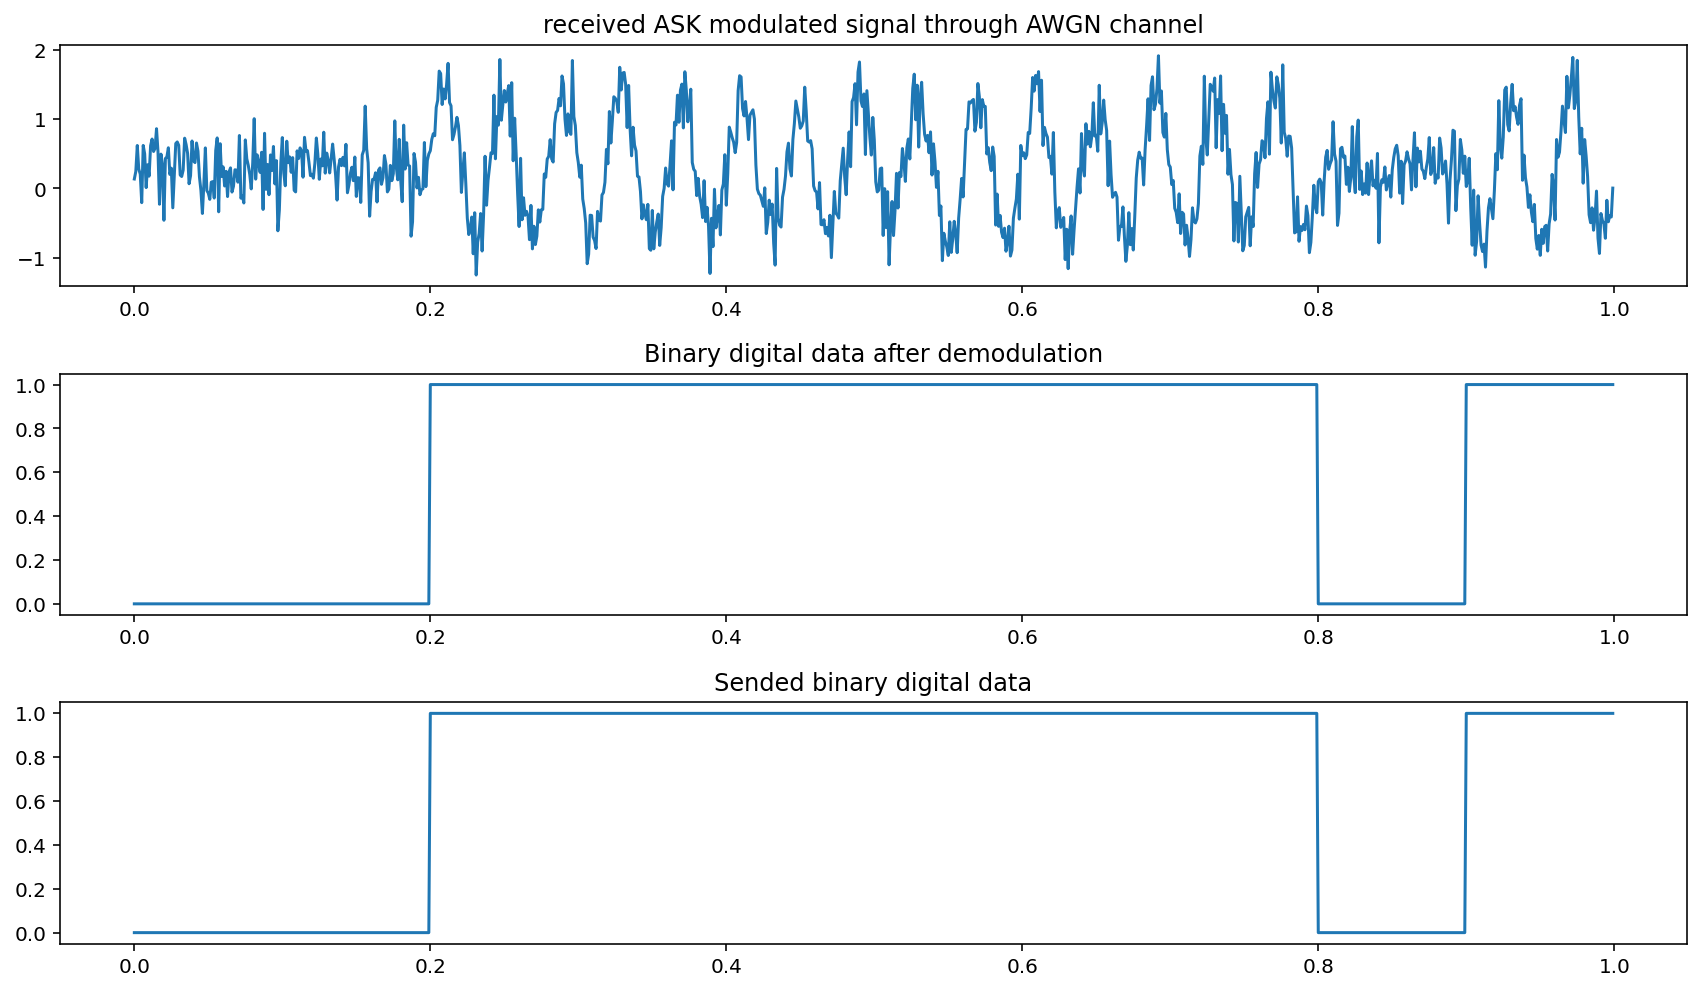

So bit loi: 
0
Xac suat loi: 
0.0


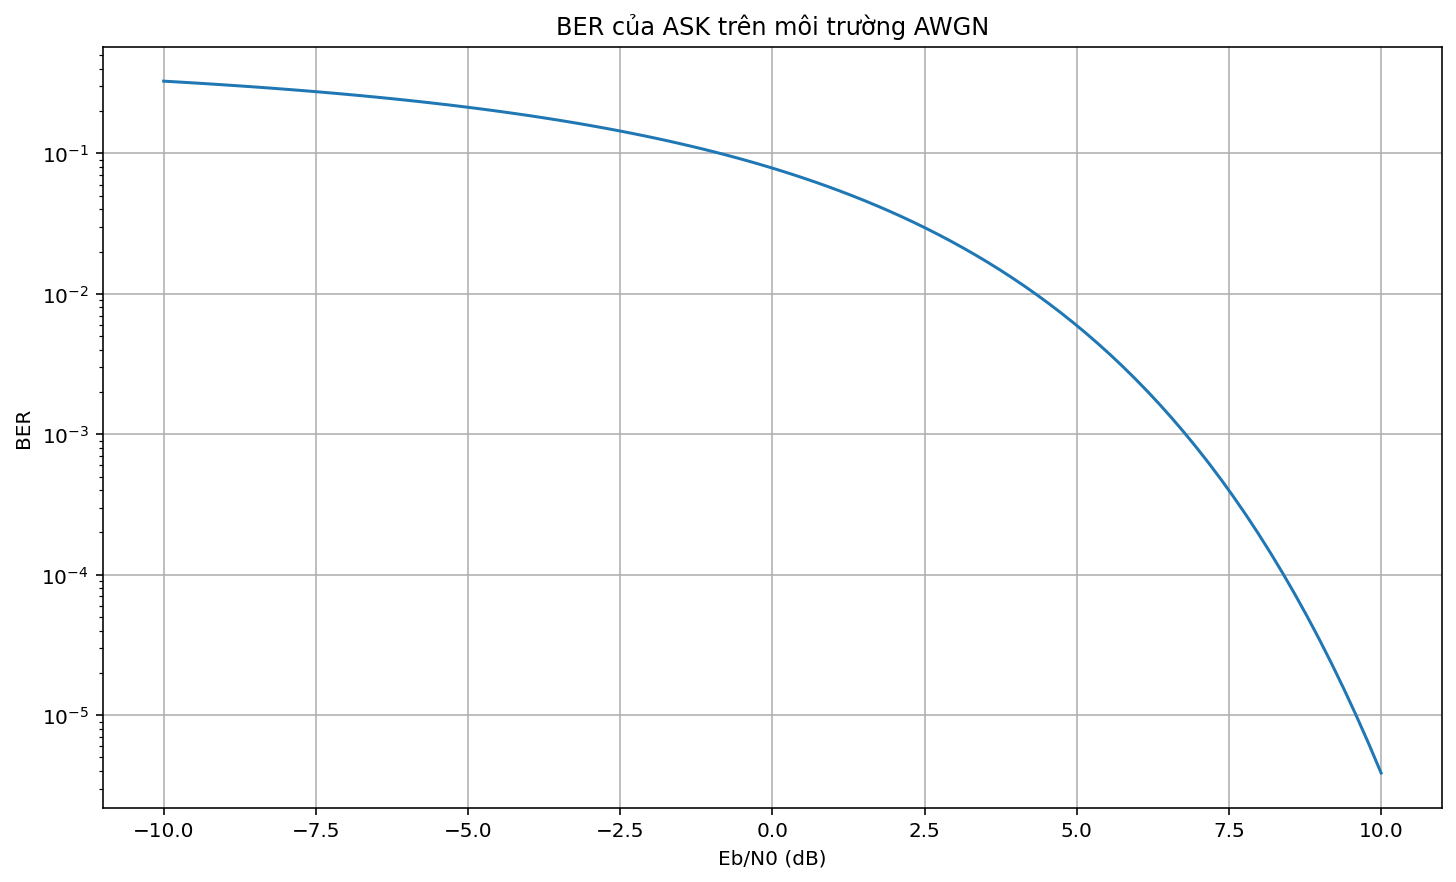

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.special import erfc #erfc/Q function

def binary(Nsym, sym_len):
    rand_n = np.random.rand(Nsym)
    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n <= 0.5)] = 0

    sig = np.zeros(int(Nsym * sym_len))

    idx1 = np.where(rand_n == 1)

    for i in idx1[0]:
        temp = int(i * sym_len)
        sig[temp:temp + sym_len] = 1
    return sig

# Carrier wave and binary waveform configuration parameters
Fs = 1000  # Samples per second
fc = 25  # Carrier frequency 100 Hz, 100 cycles/sec
T = 1  # Total simulation time in seconds
t = np.arange(0, T, 1/Fs)
x = np.sin(2 * pi * fc * t)
Td = 0.1  # Bit duration
Nsamples = int(Td * Fs)  # Samples in one bit duration
Nsym = int(np.floor(np.size(t) / Nsamples))

# Python code to generate binary stream of data
sig = binary(Nsym, Nsamples)

# ASK waveform generation
Xask = x * sig

# Giải điều chế ASK modulated waveform
def ask_demodulation(ask_signal, carrier, Fs, Td, Nsym):
    demod_signal = ask_signal * np.conj(carrier)
    symbols = demod_signal.reshape((Nsym, -1))
    energy = [np.sum(np.abs(symbol) ** 2) for symbol in symbols]
    binary_stream = np.zeros(Nsym)
    binary_stream[np.where(energy >= np.mean(energy))] = 1
    return binary_stream

# Day bit sau khi giai dieu che
binary_stream = ask_demodulation(Xask, x, Fs, Td, Nsym)

# Chuyen day bit sang tin hieu de ve do thi
def binToSignal(binary_stream, Fs, Td):
    signal = np.array([])
    for bit in binary_stream:
        bitSignal = np.empty((int)(Fs * Td))
        if(bit==0):
            bitSignal.fill(0)
        else:
            bitSignal.fill(1)
        signal = np.append(signal, bitSignal)
    return signal

# Day bit sau giai dieu che de ve do thi
bin_stream = binToSignal(binary_stream, Fs, Td)

# Binary waveform and ASK waveform Plots
figure, axis = plt.subplots(4)
axis[0].plot(t, x)
axis[0].set_title("Carrier")
axis[1].plot(t,sig)
axis[1].set_title("Binary digital data")
axis[2].plot(t, Xask ,'r')
axis[2].set_title("ASK modulated signal")
axis[3].plot(t, bin_stream)
axis[3].set_title("Binary digital data after demodulation")
plt.tight_layout()
plt.show()


N0 = 0.3
noise = np.random.normal(N0,0.3,t.size)
rSignal = Xask + noise
rBinary_stream = ask_demodulation(rSignal, x, Fs, Td, Nsym)
rBin_stream = binToSignal(rBinary_stream, Fs, Td)
figure, axis = plt.subplots(3)
axis[0].plot(t, rSignal)
axis[0].set_title("received ASK modulated signal through AWGN channel")
axis[1].plot(t, rBin_stream)
axis[1].set_title("Binary digital data after demodulation")
axis[2].plot(t, sig)
axis[2].set_title("Sended binary digital data")
plt.tight_layout()
plt.show()

bitErr = 0;
for i in range(1,binary_stream.size):
    if binary_stream[i] != rBinary_stream[i]:
        bitErr = bitErr + 1
BER = bitErr / binary_stream.size
print("So bit loi: ")
print(bitErr)
print("Xac suat loi: ")
print(BER)


# Tính giá trị BER tương ứng với SNR
EbN0dBs = np.linspace(-10, 10, 100)
BER = 1/2 *erfc(np.sqrt(10**(SNR/10)))

# Vẽ đồ thị BER
plt.semilogy(EbN0dBs, BER)
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER')
plt.title('BER của ASK trên môi trường AWGN')
plt.grid()
plt.show()